# "Who ordered that?": A Dimuon Analysis 

- **[Introduction to Dimuons](#Introduction)**
- **[Initialization & Exploration](#Initialization_Exploration)**
- **[Basic Analysis: Looking at Histograms](#Basic_Analysis)**
- **[Main Analysis](#Main_Analysis)**

---
<a name="1.-Introduction to Dimuons"></a>
## Introduction to Dimuons


In the 1930s, physicists thought that they discovered all the subatomic particles out there. However, in 1936 an unexpected particle was discovered. The electron's heavier cousin: the muon. This made the Nobel Laurate, Isaac Rabi say: "Who ordered that?". A muon has a twin called an antimuon. A pair of muon and antimuon is called dimuon which is the main target of this analysis. 

"Why Do we care about them" you might wonder. Muons can be used to test fundemental physics, like the [Mu2e experiment](https://mu2e.fnal.gov/), to see if there is physics beyond the standard model or not. Another thing, that is more practical, is muography. Using cosmic muons, we can image different things like the pyramids and even volcanoes! 

Objectives:
- To identify the source particles of dimuons (in the dataset) and explain their energy spectra.
- To study the effect of pseudorapidity on the kinematics of dimuons and the resolution of the invariant mass histogram. 
- To compare between tracker muons and global muons. 

Target Audience: 
- Physicists, physics enthusiasts and anyone with curiosity 😊

The dataset used in this project comes from high-energy physics experiments where dimuons are produced in proton-proton collisions, such as those at the CERN Compact Muon Detector (CMS). 
This dataset has 475,465 events with 21 features, which includes variables like:
- __Momentum__ and __energy__ of each muon.
- __Pseudorapidity__ ($η$), which describes the angle of the muons relative to the beamline.
- __Invariant mass of the muon pair__, useful for identifying possible particle resonances (like the $J/ψ, ϒ,$ or $Z$ boson).

__Data Dictionary:__

| #  | Column(s) | Data type   | Description | 
|----|--------|---------| ---------|
| 0  | Run    | int64   | The run number of the event.|
| 1  | Event  | int64   | The event number.|
| 2  | Type1 & Type2  | object  | Either T or G: whether the muon is a tracker or global muon.|
| 3  | E1 & E2    | float64 | The energy of the dimuons|
| 4  | px1 & px2   | float64 | The x-component of momentum of the dimuons|
| 5  | py1 & py2    | float64 | The y-component of momentum of the dimuons|
| 6  | pz1 & pz2   | float64 | The z-component of momentum of the dimuons|
| 7  | pt1 & pt2   | float64 | The transverse momentum of the dimuons|
| 8  | eta1 & eta2  | float64 | The pseudorapidity of the dimuons |
| 9  | phi1 & phi2  | float64 | The azimuthal angle of the dimuons |
| 10 | Q1 & Q2  | int64   | The charges of the dimuons 
| 11 | M      | float64 |  The invariant mass of the muon pair 

---
<a name="Initialization_Exploration"></a>
## Initialization & Exploration

### Initialization 

In [26]:
import pandas as pd      #Data manipulation 
import numpy as np       #numbers(?) 

#Data visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 

import mplcursors        #To find exact points on the plots 

#%matplotlib inline

In [28]:
#Read the double muon csv file 
dimuon_df = pd.read_csv("DoubleMuRun2011A.csv") 

### Exploration  

In [113]:
# Display the first 5 rows of the data
dimuon_df.head(5)

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,...,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,17.49220
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,...,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,11.55340
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,...,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,...,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.47740
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,...,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.31590


In [203]:
# Gather basic information about the dataset
dimuon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475465 entries, 0 to 475464
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Run              475465 non-null  int64  
 1   Event            475465 non-null  int64  
 2   Type1            475465 non-null  object 
 3   E1               475465 non-null  float64
 4   px1              475465 non-null  float64
 5   py1              475465 non-null  float64
 6   pz1              475465 non-null  float64
 7   pt1              475465 non-null  float64
 8   eta1             475465 non-null  float64
 9   phi1             475465 non-null  float64
 10  Q1               475465 non-null  int64  
 11  Type2            475465 non-null  object 
 12  E2               475465 non-null  float64
 13  px2              475465 non-null  float64
 14  py2              475465 non-null  float64
 15  pz2              475465 non-null  float64
 16  pt2              475465 non-null  floa

In [115]:
# Gather descriptive statistics about the data
dimuon_df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,475465.000000,4.754650e+05,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000
mean,167785.943119,4.788622e+08,21.902022,-0.107231,-0.713106,-1.040151,10.942925,-0.094117,-0.112941,0.035100,15.896824,0.069391,0.675708,0.800491,10.901173,0.078403,0.112177,-0.035100,19.291277
std,3698.877156,5.593981e+08,29.624106,11.627325,12.127312,32.762900,10.846589,1.299287,1.821436,0.999385,18.554144,10.839557,10.951980,18.931736,15.769593,0.952914,1.804345,0.999385,22.733836
min,160957.000000,9.000000e+01,2.705040,-2872.290000,-3846.230000,-7237.650000,0.086912,-2.399940,-3.141590,-1.000000,2.576120,-250.267000,-1339.220000,-612.048000,0.133530,-2.399860,-3.141550,-1.000000,0.300006
25%,165617.000000,1.125653e+08,9.098770,-4.789810,-5.115530,-11.209200,5.280940,-1.255120,-1.694370,-1.000000,6.950840,-4.642460,-4.224930,-4.953800,5.202850,-0.610616,-1.428470,-1.000000,4.834930
50%,166701.000000,2.579929e+08,13.723900,-0.110537,-0.736226,-1.589870,7.391320,-0.177596,-0.216865,1.000000,10.053400,0.072385,0.662365,0.647675,7.321510,0.085832,0.203961,-1.000000,13.078300
75%,172791.000000,6.068714e+08,22.591000,4.677240,4.227450,9.587310,11.611000,1.110350,1.456980,1.000000,17.065000,4.704260,5.070920,6.379760,11.600600,0.764926,1.672350,1.000000,21.108900
max,173692.000000,3.056722e+09,8684.880000,505.579000,265.895000,843.854000,969.958000,2.399960,3.141560,1.000000,1604.970000,528.899000,326.782000,709.011000,7921.690000,2.399900,3.141550,1.000000,299.202000


In [116]:
# Display the size of the dataframe
dimuon_df.shape

(475465, 21)

In [117]:
# Check for nulls 
dimuon_df.isnull().sum()

Run      0
Event    0
Type1    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
Type2    0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

In [118]:
#Thank god, no nulls. 

In [ ]:
#Check the distributions of the features 
dimuon_df.hist(bins=30, figsize=(20,15));

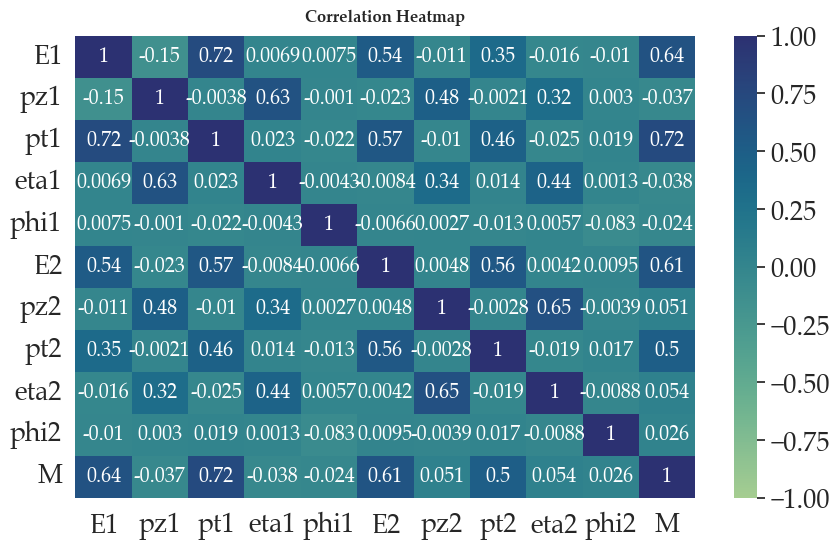

In [120]:
# Check the correlations between the variables 
plt.figure(figsize=(10, 6))

heatmap = sns.heatmap(
    data= dimuon_df.loc[:, ~dimuon_df.columns.isin(["Run","Event",'Q1','Q2','px1','px2','py1','py2'])].select_dtypes(include='number').corr(), #select_dtypes(include='number')
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("crest", as_cmap=True)
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

<Figure size 1200x800 with 0 Axes>

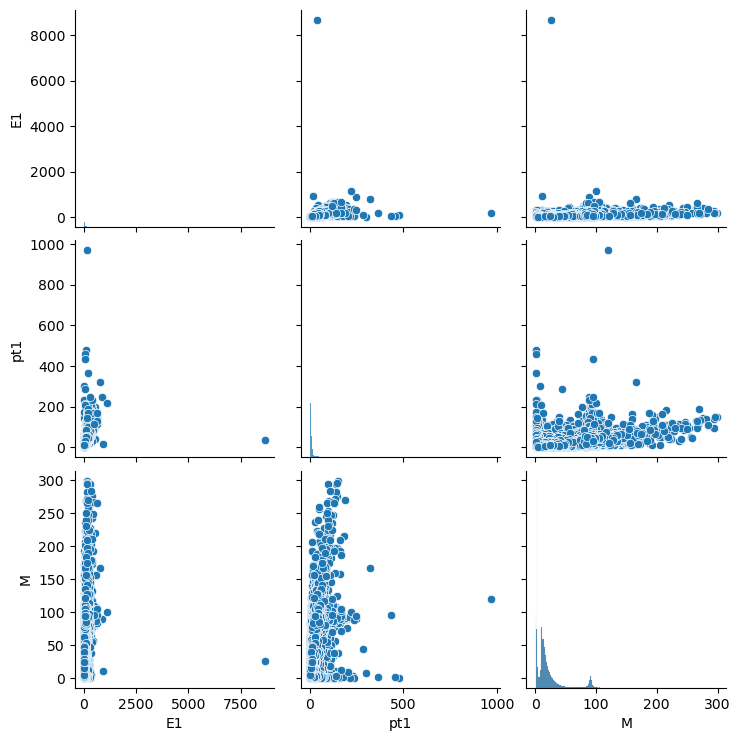

In [9]:
#Check the plots of some of the high-correlation variables 
plt.figure(figsize=(12, 8))
attributes = ["E1","pt1","M"]
sns.pairplot(dimuon_df[attributes]);

In [ ]:
# Deal with outliers (Future Work) 

---
<a name="Basic_Analysis"></a>
## Basic Analysis: Looking at Histograms

The __color palette__ for the plots 

In [85]:
#ff6579   red
#7ddbae   green
#be33ba   violet
#3394be   dark blue 
#00965f   dark green 
#ffb000   orange 
#fddf78   yellow 

Set the __plotting style__

In [164]:
plt.rcParams.update({
    'font.family': 'Palatino Linotype',
    'axes.labelsize': 20,
    'axes.titlesize': 25,
    'xtick.labelsize': 19,
    'ytick.labelsize': 19,
    'legend.fontsize': 16,
    'figure.figsize': (7, 7),
    'lines.linewidth': 5,
    'grid.alpha': 0.5,
    'axes.titleweight': 'bold',  
    'axes.titlepad': 10,        
    'axes.labelweight': 'bold',
})

### Basic histograms of some of the variables in the data 

Define a function for plotting the histograms 

In [95]:
def histogram(var1, font_scale = 1.5,figsize = (10,6), var_name = 'b', range = (0,60)): 
    '''
    var: The variable you want to plot.
    var_name: The name you want to appear on the plot title 
    '''
    plt.rcParams["figure.figsize"] = figsize
    plt.rcParams["axes.titlesize"] = font_scale * 14
    plt.rcParams["axes.labelsize"] = font_scale * 12
    plt.rcParams["xtick.labelsize"] = font_scale * 10
    plt.rcParams["ytick.labelsize"] = font_scale * 10
    plt.rcParams["legend.fontsize"] = font_scale * 10

    dimuon_df.hist(var1, range = range ,bins = 100, color = '#47b8ea')
    
    plt.title(f"{var_name}") 
    plt.ylabel("Number of Events") 

#### Pseudorapidity of the 1st and 2nd muon

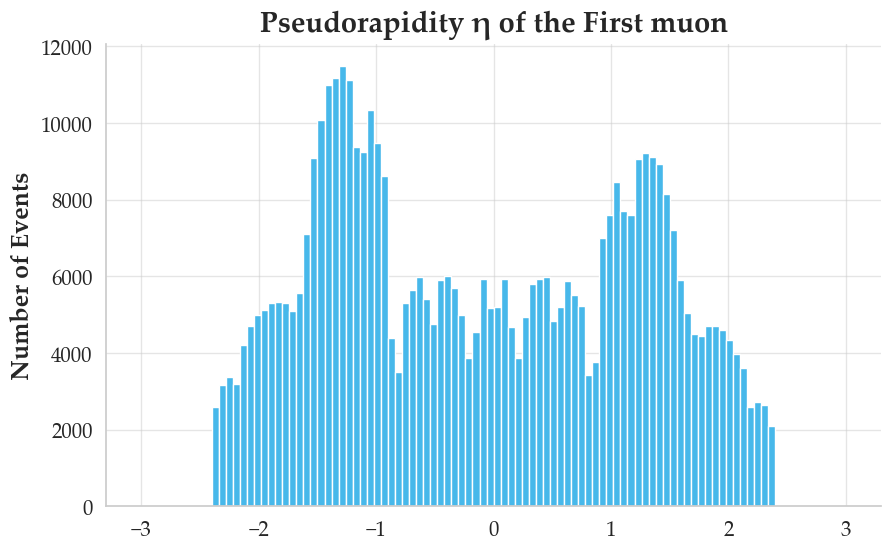

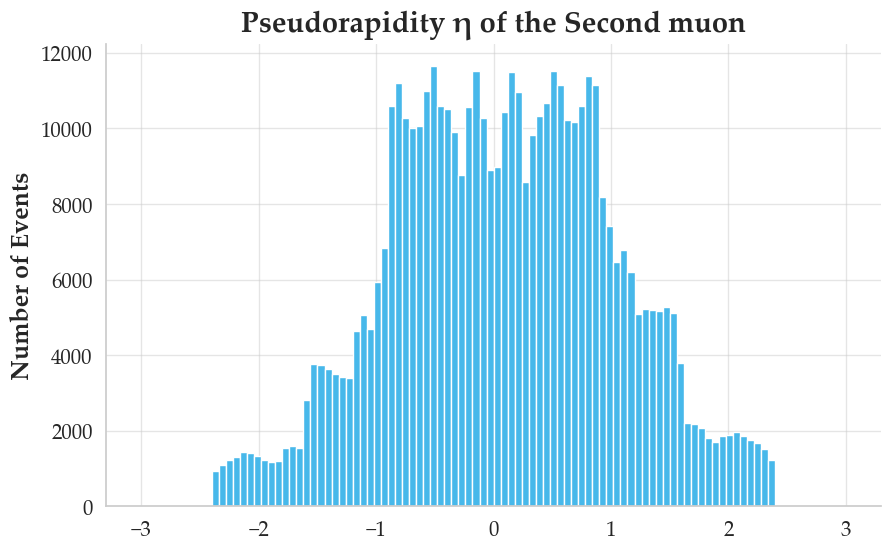

In [180]:
#1st muon 
histogram("eta1", var_name = "Pseudorapidity η of the First muon", range = (-3,3))

#2nd muon 
histogram("eta2", var_name = "Pseudorapidity η of the Second muon", range = (-3,3))

#### Transverse Momentum and Energy of the 1st muon

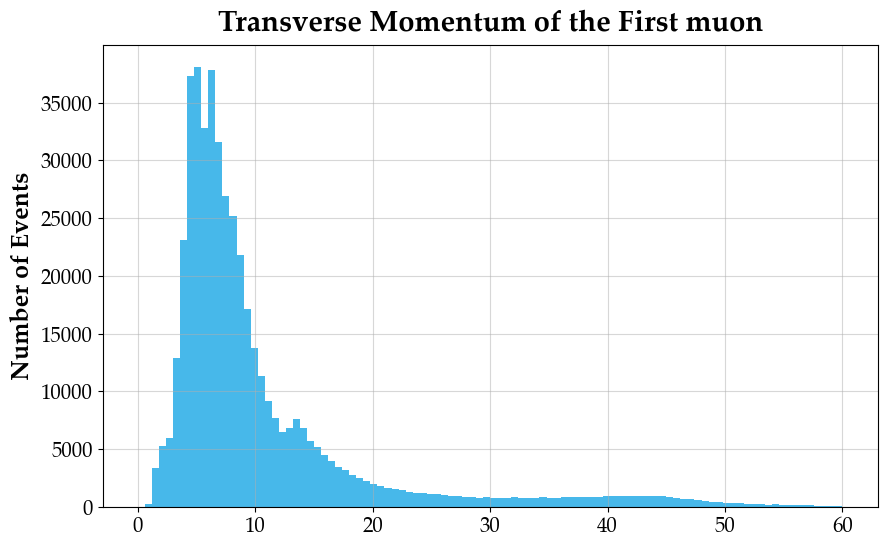

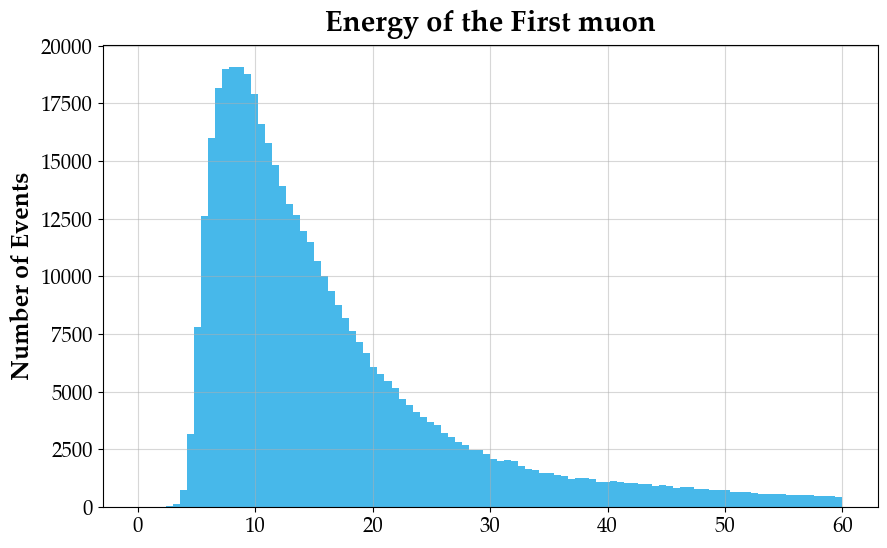

In [108]:
#Transverse momentum 
histogram("pt1", var_name = "Transverse Momentum of the First muon")

#Energy 
histogram("E1", var_name = "Energy of the First muon")

### Invariant mass histogram: Finding Source Particles 

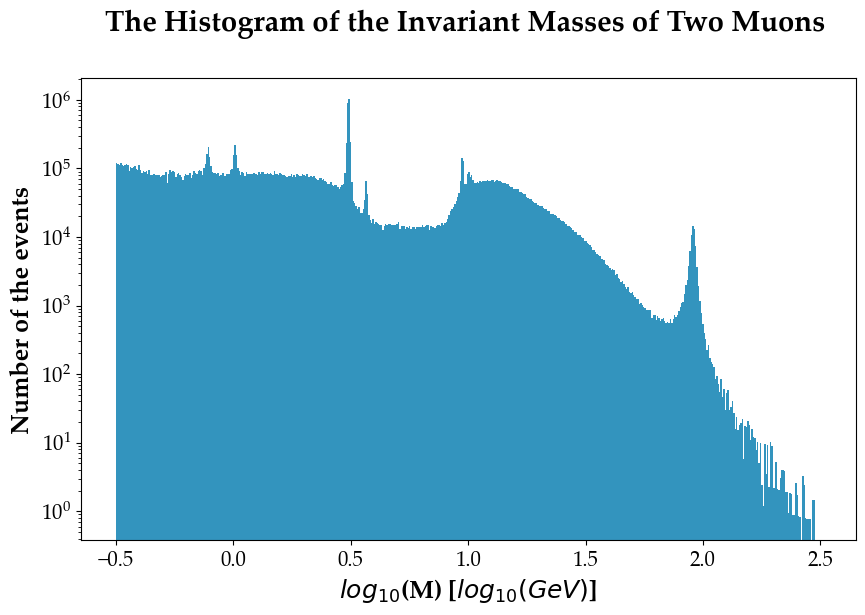

In [120]:
invariant_mass = dimuon_df['M'] 

no_bins = 500

#Plot the invariant mass in the logarithmic scale 
inv_mass_log = np.log10(invariant_mass)
weights = []

for i in invariant_mass:
    weights.append(no_bins/np.log(10)/i)

#Plotting the weighted histogram.
plt.hist(inv_mass_log, no_bins, range=(-0.5,2.5), weights=weights, lw=0, color="#3394be")
plt.yscale('log')

plt.xlabel(r'$log_{10}$(M) [$log_{10}(GeV)$]')
plt.ylabel('Number of the events')
plt.title('The Histogram of the Invariant Masses of Two Muons \n')
plt.show()

#### Labeling the peaks (source particles) 

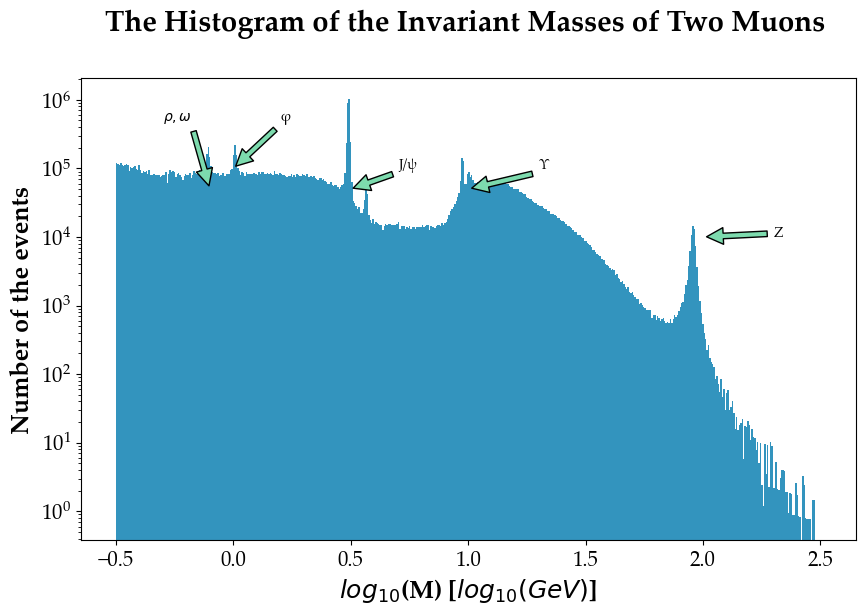

In [124]:
invariant_mass = dimuon_df['M'] 

no_bins = 500

#Plot the invariant mass in the logarithmic scale 
inv_mass_log = np.log10(invariant_mass)
weights = []

for i in invariant_mass:
    weights.append(no_bins/np.log(10)/i)

#Plotting the weighted histogram.
plt.hist(inv_mass_log, no_bins, range=(-0.5,2.5), weights=weights, lw=0, color="#3394be")
plt.yscale('log')

plt.xlabel(r'$log_{10}$(M) [$log_{10}(GeV)$]')
plt.ylabel('Number of the events')
plt.title('The Histogram of the Invariant Masses of Two Muons \n')

## Identifying source particles from the peaks in the histogram ##

#Z-boson Label 
plt.annotate('Z', xy=(2, 10000), xytext=(2.3, 10000),
            arrowprops=dict(facecolor='#7ddbae', shrink=0.05)
            )

#Y Label 
plt.annotate('Υ', xy=(1, 50000), xytext=(1.3, 100000),
            arrowprops=dict(facecolor='#7ddbae', shrink=0.05)
            )

#J/ψ Label 
plt.annotate('J/ψ', xy=(0.5, 50000), xytext=(0.7, 100000),
            arrowprops=dict(facecolor='#7ddbae', shrink=0.05)
            )

#φ Label 
plt.annotate('φ', xy=(0, 100000), xytext=(0.2, 500000),
            arrowprops=dict(facecolor='#7ddbae', shrink=0.05)
            )

#ρ,ω Label 
plt.annotate('$ρ,ω$', xy=(-0.1, 50000), xytext=(-0.3, 500000),
            arrowprops=dict(facecolor='#7ddbae', shrink=0.05)
            )

plt.show()

#### Zooming in to each peak

In [137]:
def M_hist_source_particle(figsize=(10, 6),x1 = 0,x2 = 0,a = -0.5,b = 2.5):
    """
    A function that plots a histogram of the invariant mass of two muons and identify the
    source particles by adding two dashed vertical lines confining the peak on the histogram.

    Parameters:
    - figsize: tuple, size of the figure (default: (10, 6))
    - x1: The position of the first vertical line 
    - x2: The position of the second vertical line 
    - a, b: The x range for the histogram 
    """

    plt.hist(inv_mass_log, no_bins, range=(a,b), weights=weights, lw=0, color="#3394be")
    plt.yscale('log')
    
    plt.axvline(x = x1, c = 'b', label = 'axvline - full height', ls = '--')
    plt.axvline(x = x2, c = 'b', label = 'axvline - full height', ls = '--')

    #Set the axes labels and the title of the plot 
    plt.xlabel('log10(invariant mass) [log10(GeV)]')
    plt.ylabel('Number of the events')
    plt.title('The histogram of the invariant masses of two muons \n')
    plt.show()


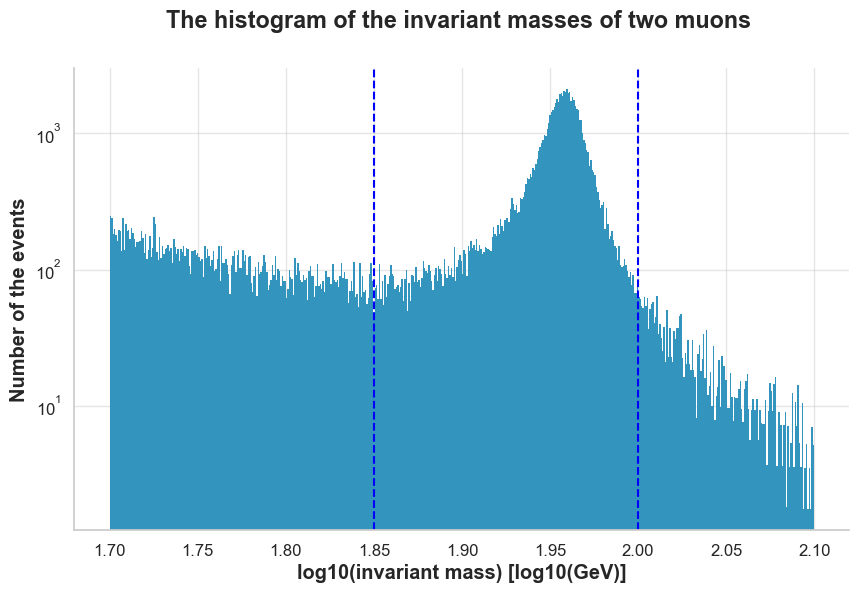

In [139]:
#Z boson 
M_hist_source_particle(x1 = 1.85, x2 = 2, a = 1.7, b = 2.1)

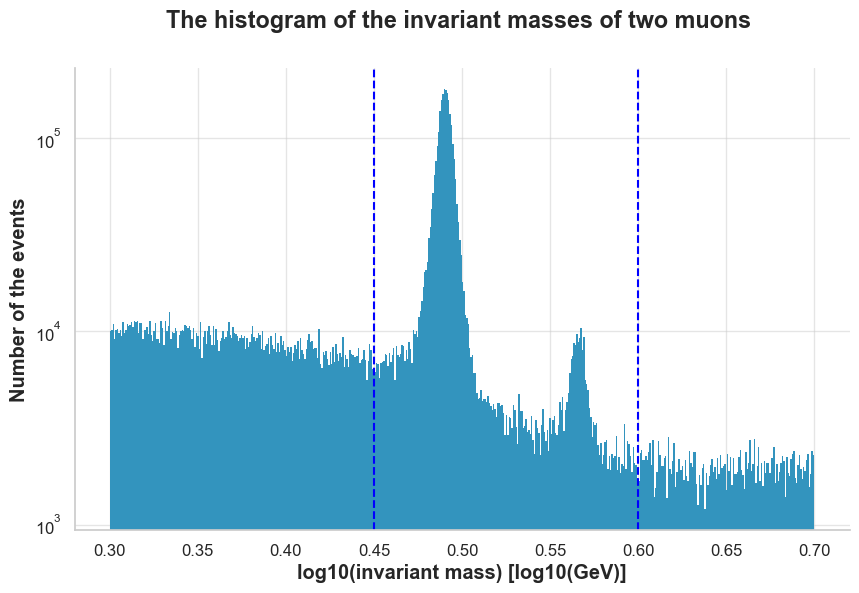

In [135]:
#J/ψ and ψ' 
M_hist_source_particle(x1 = 0.45 , x2 = 0.6, a = 0.3, b = 0.7)

In [ ]:
#η, ρ,ω and φ. 
M_hist_source_particle(x1 = -0.15 , x2 = 0.1, a = -0.3, b = 0.4)

---
<a name="Main_Analysis"></a>
## Main Analysis

- Comparison between the kinematics of muons from different source particles 
- Pseudorapidity effects on the momentum, energy and invariant mass histogram.  
- Comparison between Global and tracker muons. 

### Segmenting to different source particles 

The range for each filter was chosen according to the [Run2011A CMS dataset](https://opendata.cern.ch/record/545) on CERN's open data website

In [30]:
#Z boson 
Z_boson_filter = (dimuon_df.pt1 > 20) & (dimuon_df.pt2 > 20) & (dimuon_df.eta1 < 2.1) & (dimuon_df.eta2 < 2.1) & ((dimuon_df.M > 60) & (dimuon_df.M < 120)) 
dimuon_df.loc[Z_boson_filter,'Source Particle'] = "Z boson" 

#Y 
Y_filter = (dimuon_df.eta1 < 2.4) & (dimuon_df.eta2 < 2.4) & (dimuon_df.M > 8) & (dimuon_df.M < 12) 
dimuon_df.loc[Y_filter,'Source Particle'] = "Υ" 

#J/ψ
J_ψ_filter = (dimuon_df.M > 2) & (dimuon_df.M < 5)
dimuon_df.loc[J_ψ_filter,'Source Particle'] = "J/ψ" 

#The bounds for these particles were found from the plots

#φ
φ_filter = (dimuon_df.M > 0.979) & (dimuon_df.M < 1.046)
dimuon_df.loc[φ_filter,'Source Particle'] = "φ" 

#ρ,ω
ρ_ω_filter = (dimuon_df.M > 0.741) & (dimuon_df.M < 0.812)
dimuon_df.loc[ρ_ω_filter,'Source Particle'] = "ρ,ω" 

In [32]:
#Check the number of events per source particle 
dimuon_df["Source Particle"].value_counts()

Source Particle
Υ          79989
J/ψ        69189
Z boson    29517
φ           3322
ρ,ω         3203
Name: count, dtype: int64

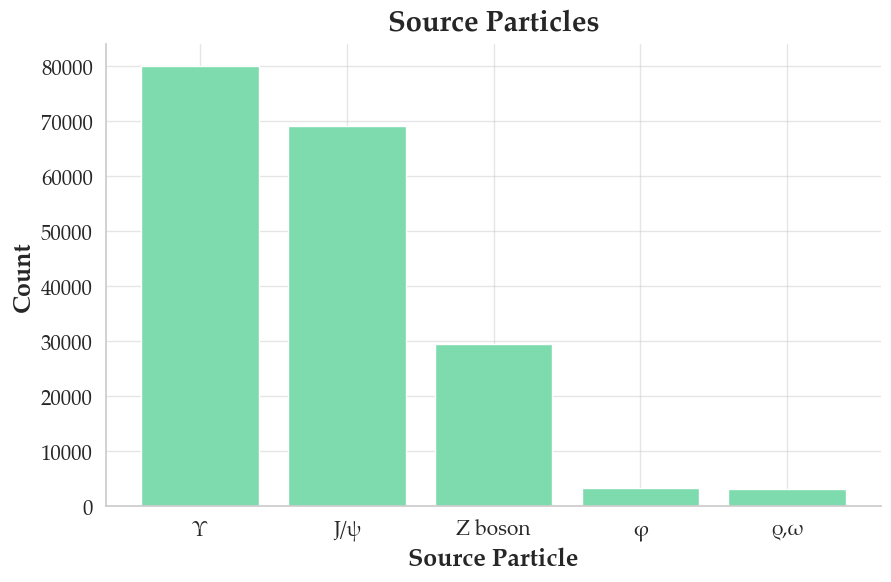

In [184]:
#Visualise it 
counts = dimuon_df['Source Particle'].value_counts()

plt.bar(counts.index, counts.values, color='#7ddbae')
plt.xlabel('Source Particle')
plt.ylabel('Count')
plt.title('Source Particles')
plt.xticks()  
plt.show()

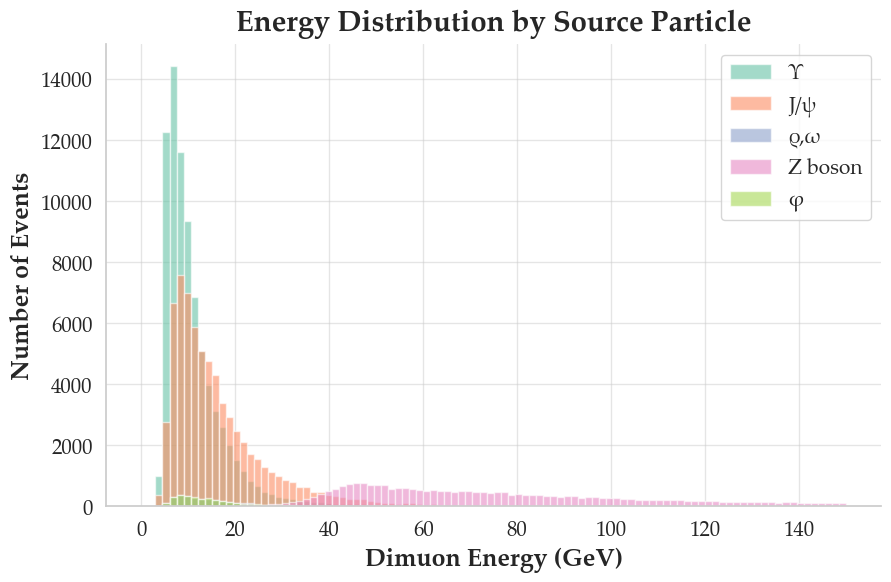

In [194]:
plt.figure(figsize=(10, 6))

# Loop through each source particle
for source in dimuon_df['Source Particle'].dropna().unique():
    subset = dimuon_df[dimuon_df['Source Particle'] == source]
    plt.hist(subset['E1'], bins=100, alpha=0.6, label=source, range = (0,150))

plt.xlabel('Dimuon Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('Energy Distribution by Source Particle')
plt.legend()
plt.grid(True)
plt.show()

#### Fitting the Z boson peak 

The following code was taken from [here](https://github.com/cms-opendata-education/zboson-exercise/blob/master/Exercise.ipynb)

The values and the uncertainties from the optimization

The value of the decay width (gamma) = 3.925614105100696 +- 0.0771482602314804
The value of the maximum of the distribution (M) = 90.80163789655086 +- 0.030230656411701515
a = -1.6446678341515943 +- 0.12527572763710268
b = 168.3037201667517 +- 12.655593076511822
A = 13102.560695988694 +- 178.61394044713396


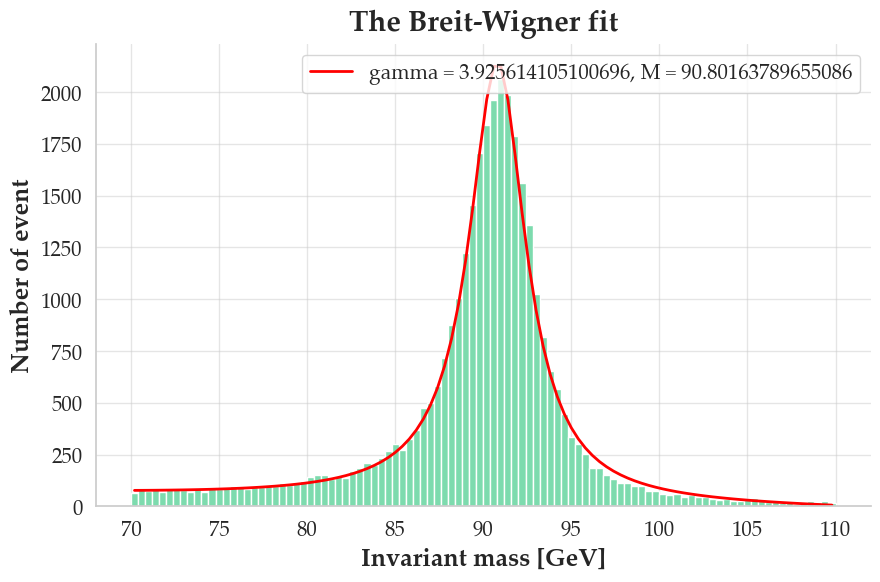

In [182]:
# Let's limit the fit near to the peak of Z boson in the invariant mass histogram.
lowerlimit = 70
upperlimit = 110
bins = 100

# Let's select the invariant mass values that are inside the limitations.
limitedmasses = invariant_mass[(invariant_mass > lowerlimit) & (invariant_mass < upperlimit)]

#Let's create a histogram of the selected values.
histogram = plt.hist(limitedmasses, bins=bins, range=(lowerlimit,upperlimit), color = "#7ddbae")

# In y-axis the number of the events per each bin (can be got from the variable histogram).
# In x-axis the centers of the bins.
y = histogram[0]
x = 0.5*( histogram[1][0:-1] + histogram[1][1:])

# Let's define a function that describes Breit-Wigner distribution for the fit.
# E is the energy, gamma is the decay width, M the maximum of the distribution
# and a, b and A different parameters that are used for noticing the effect of
# the background events for the fit.
def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

# Initial values for the optimization in the following order:
# gamma (the full width at half maximum (FWHM) of the distribution)
# M (the maximum of the distribution)
# a (the slope that is used for noticing the effect of the background)
# b (the y intercept that is used for noticing the effect of the background)
# A (the "height" of the Breit-Wigner distribution)
initials = [12, 91, -2, 200, 13000]  #gamma,invariant mass M 

# Let's import the module that is used in the optimization, run the optimization
# and calculate the uncertainties of the optimized parameters.
from scipy.optimize import curve_fit
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
# Let's print the values and uncertainties that are got from the optimization.
print("The values and the uncertainties from the optimization")
print("")
first = "The value of the decay width (gamma) = {} +- {}".format(best[0], error[0])
second = "The value of the maximum of the distribution (M) = {} +- {}".format(best[1], error[1])
third = "a = {} +- {}".format(best[2], error[2])
fourth = "b = {} +- {}".format(best[3], error[3])
fifth = "A = {} +- {}".format(best[4], error[4])
print(first)
print(second)
print(third)
print(fourth)
print(fifth)

plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]), lw = 2)
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of event')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

### Segmentation of data by η: 

In [201]:
great_etas = dimuon_df[np.absolute(dimuon_df.eta1>1.52) & np.absolute(dimuon_df.eta2>1.52)]
small_etas = dimuon_df[np.absolute(dimuon_df.eta2<0.38) & np.absolute(dimuon_df.eta2<0.38)] 

#Let's print out some information about the selection
print('Amount of all events = %d' % len(dimuon_df))
print('Amount of the events where the pseudorapidity of the both muons have been large = %d' %len(great_etas))
print('Amount of the events where the pseudorapidity of the both muons have been small = %d' %len(small_etas))

Amount of all events = 475465
Amount of the events where the pseudorapidity of the both muons have been large = 14428
Amount of the events where the pseudorapidity of the both muons have been small = 288119
Amount of the events where the pseudorapidity of the both muons have been really small = 240146


Text(0.5, 0, 'invariant mass [GeV]')

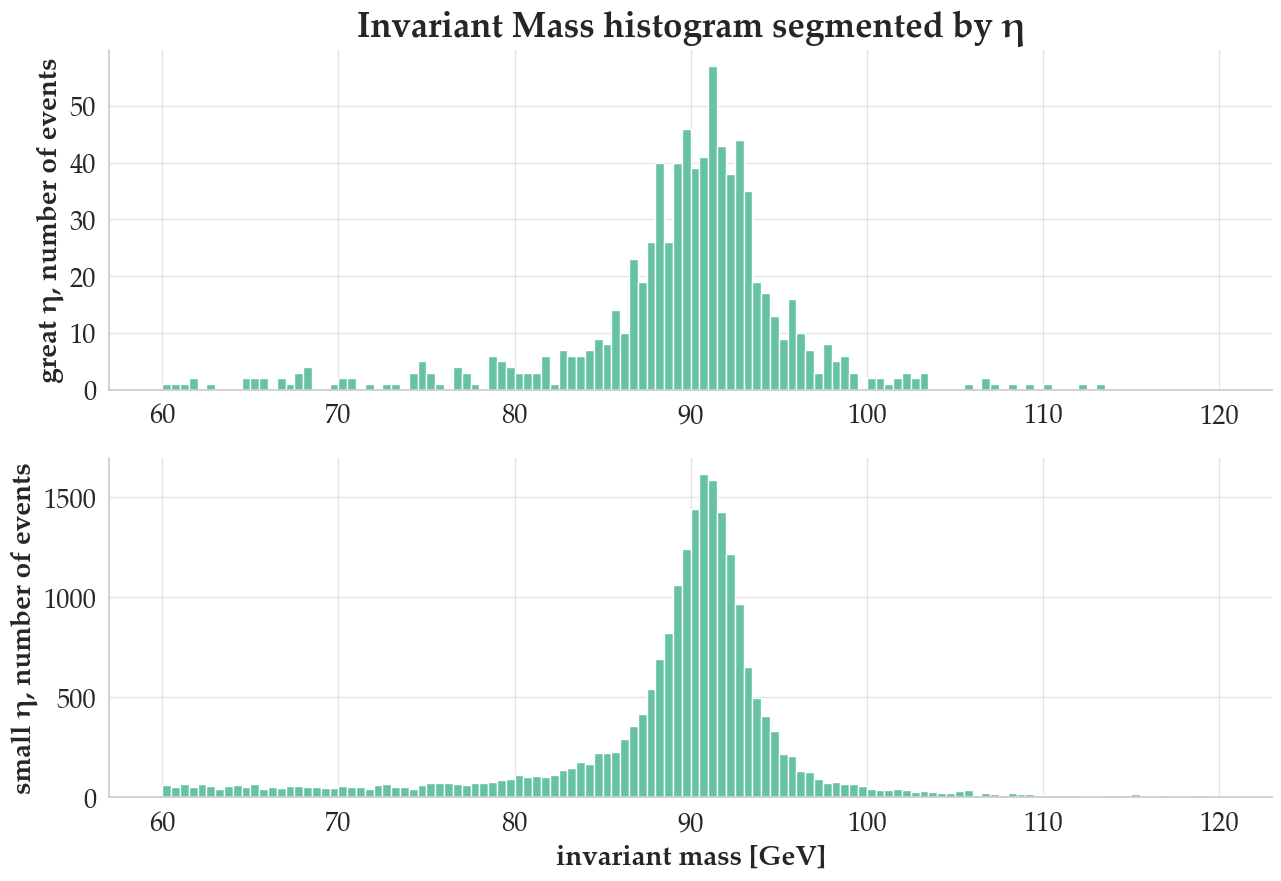

In [203]:
M_great = great_etas['M']
M_small = small_etas['M']

f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(15)
plt.subplot(311)
plt.hist(M_great, bins=120, range=(60,120))
plt.title("Invariant Mass histogram segmented by η")
plt.ylabel('great η, number of events', fontsize=20)
plt.subplot(312)
plt.hist(M_small, bins=120, range=(60,120))
plt.ylabel('small η, number of events', fontsize=20)
plt.xlabel('invariant mass [GeV]', fontsize=20)
plt.show()

The above plot shows that the invariant-mass peak is affected by the pseudorapidity.This can be explained by the resolution of different parts of the detector. For greater η, the dimuons are detected by the end caps which have lower resolution. On the other hand, for lower η, the dimuons are detected by the barrel part of the detector which has higher resolution and thus, the defined peak. 

#### Pseudorapidity and Transverse Momentum 

In [170]:
# we only choose the events below the condition chosen (pt < cond)
cond = 10

smallPt = dimuon_df[(dimuon_df.pt1 < cond) & (dimuon_df.pt2 < cond)]

# Let us save all the etas and pts to variables
allpPt = pd.concat([smallPt.pt1, smallPt.pt2])
allEta = pd.concat([smallPt.eta1, smallPt.eta2])

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
C:\Users\noorf\AppData\Local\Temp\ipykernel_17040\2565222120.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Pseudorapidity ($\eta$)')


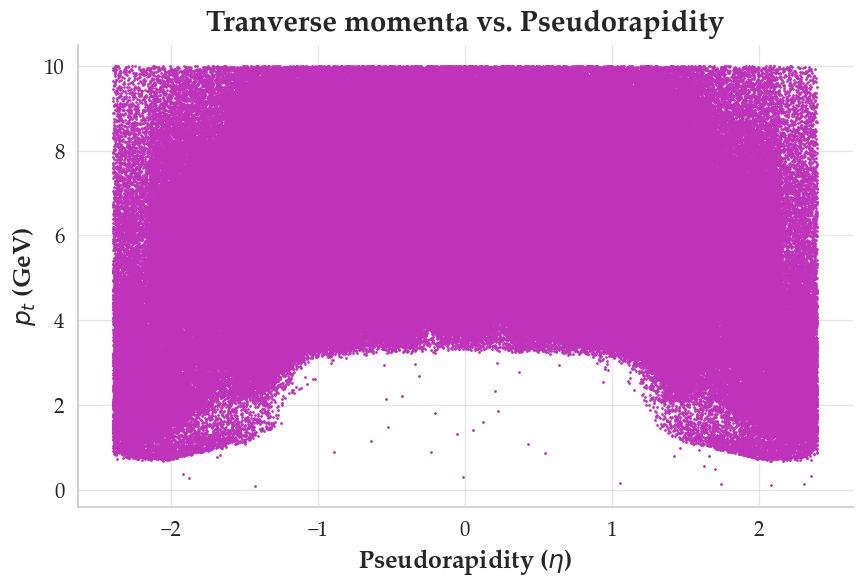

In [196]:
#Plot a scatter plot 
plt.scatter(allEta, allpPt, s=1, color = "#be33ba")

plt.ylabel('$p_t$ (GeV)')
plt.xlabel('Pseudorapidity ($\eta$)')
plt.title('Tranverse momenta vs. Pseudorapidity')

plt.show()

Text(0.5, 0, 'η')

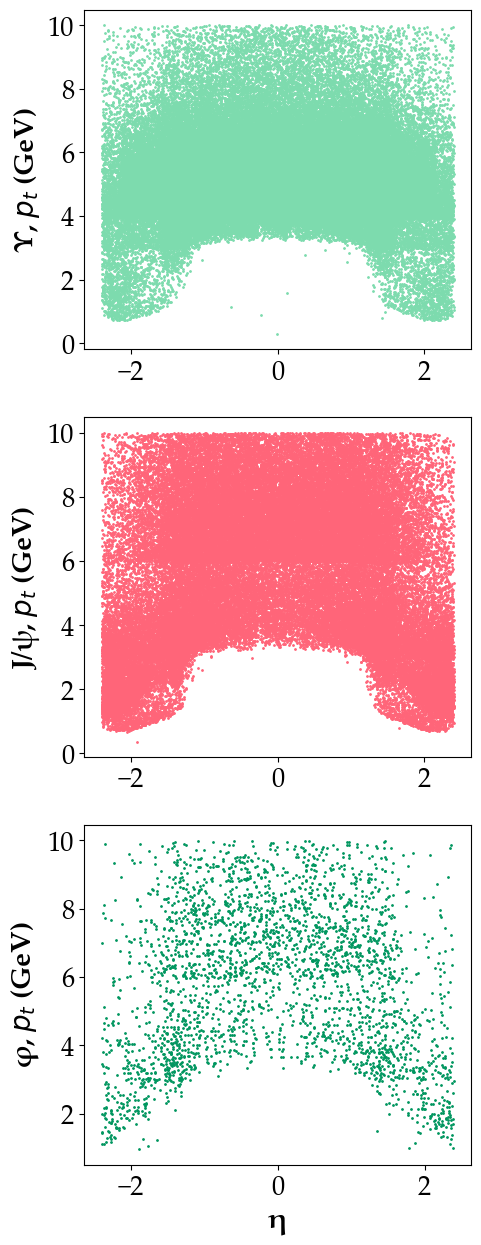

In [80]:
f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(5)
plt.subplot(311)
plt.scatter(allEta[Y_filter], allpPt[Y_filter], s=1, color = "#7ddbae")
plt.ylabel('Υ, $p_t$ (GeV)', fontsize=20)   #Y blueish green 
#plt.title('Tranverse momenta vs. Pseudorapidity')
plt.subplot(312)
plt.scatter(allEta[J_ψ_filter], allpPt[J_ψ_filter], s=1, color = "#ff6579")
plt.ylabel('J/ψ, $p_t$ (GeV)', fontsize=20)  #orange 
plt.subplot(313)
plt.scatter(allEta[φ_filter], allpPt[φ_filter], s=1, color = "#00965f")
plt.ylabel('φ, $p_t$ (GeV)', fontsize=20)  #green
plt.xlabel('η', fontsize=20)

A question to think about: Does the detector have a blindspot? 

### Comparison between Global muons and Tracker muons 

#### Load the dataset with the tracker muons and the global muons 

In [154]:
muon_df = pd.read_csv(r"https://opendata.cern.ch/record/545/files/Dimuon_SingleMu.csv") 

In [269]:
muons_df.head(5) 

,Run,Event,type1,Q1,pt1,eta1,phi1,E1,px1,py1,...,type2,Q2,pt2,eta2,phi2,E2,px2,py2,pz2,M
0,166699,835716681,G,1,4.2116,2.2366,-0.4849,19.9382,3.7261,-1.9631,...,T,-1,1.2556,2.2683,-1.4488,6.1319,0.1528,-1.2463,6.0011,2.1330
1,166699,836133459,G,-1,2.1479,-2.0159,-2.7753,8.2066,-2.0055,-0.7692,...,G,1,19.5453,-1.0826,-0.3408,32.1613,18.4210,-6.5332,-25.5406,13.6786
2,166699,836165498,G,1,21.0732,1.5948,-1.1137,54.0560,9.2997,-18.9102,...,T,-1,2.3864,1.5352,-1.7388,5.7968,-0.3991,-2.3528,5.2818,4.3813
3,166699,836249706,G,1,18.5889,1.6422,1.1923,49.8180,6.8688,17.2734,...,G,-1,1.8721,1.9704,1.6393,6.8459,-0.1281,1.8678,6.5841,3.2587
4,166699,835608783,G,-1,11.8194,0.8711,-1.5811,16.5947,-0.1214,-11.8187,...,T,1,0.9408,2.0107,-1.6559,3.5779,-0.0799,-0.9374,3.4504,4.0171


In [104]:
#Check how many tracker muons and global muons are in the dataset 
muons_df.type2.value_counts()

type2
T    49019
G    34742
Name: count, dtype: int64

In [158]:
#Create filters to seperate the tracker muons and the global muons 
T_muon_filter = muon_df.type2 == 'T' 
G_muon_filter = muon_df.type2 == 'G' 

In [160]:
#Repeat the source particle segmentation 
Z_boson_filter = (muon_df.pt1 > 20) & (muon_df.pt2 > 20) & (muon_df.eta1 < 2.1) & (muon_df.eta2 < 2.1) & ((muon_df.M > 60) & (muon_df.M < 120)) 
muon_df.loc[Z_boson_filter,'Source Particle'] = "Z boson" 

Y_filter = (muon_df.eta1 < 2.4) & (muon_df.eta2 < 2.4) & (muon_df.M > 8) & (muon_df.M < 12) 
muon_df.loc[Y_filter,'Source Particle'] = "Υ" 

J_ψ_filter = (muon_df.M > 2) & (muon_df.M < 5)
muon_df.loc[J_ψ_filter,'Source Particle'] = "J/ψ" 

#The bounds for these particles were found from the plots using the #cursor thing 
# ψ_dash = 
φ_filter = (muon_df.M > 0.979) & (muon_df.M < 1.046)
muon_df.loc[φ_filter,'Source Particle'] = "φ" 

ρ_ω_filter = (muon_df.M > 0.741) & (muon_df.M < 0.812)
muon_df.loc[ρ_ω_filter,'Source Particle'] = "ρ,ω" 


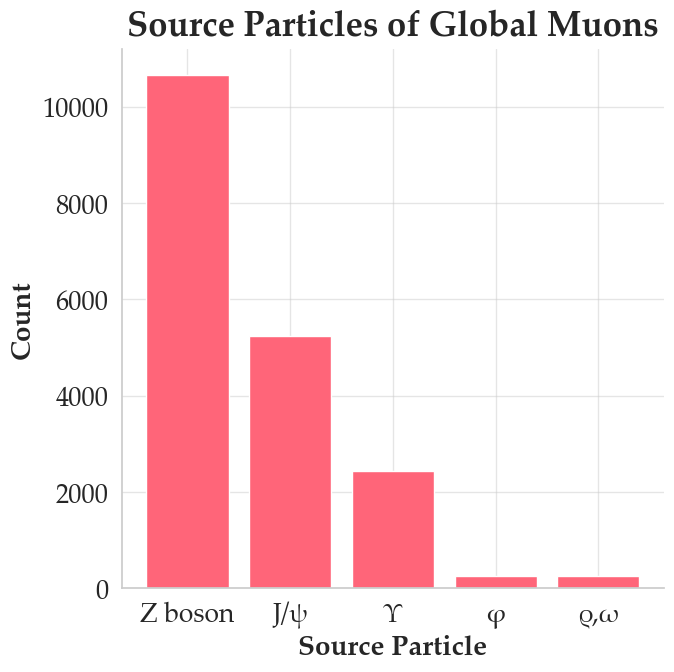

In [248]:
#Create a plot with the number of events from each source particle 
counts_G = muon_df['Source Particle'][G_muon_filter].value_counts()

plt.bar(counts_G.index, counts_G.values, color='#ff6579')

plt.xlabel('Source Particle')
plt.ylabel('Count')
plt.title('Source Particles of Global Muons')
plt.xticks()  
plt.show()

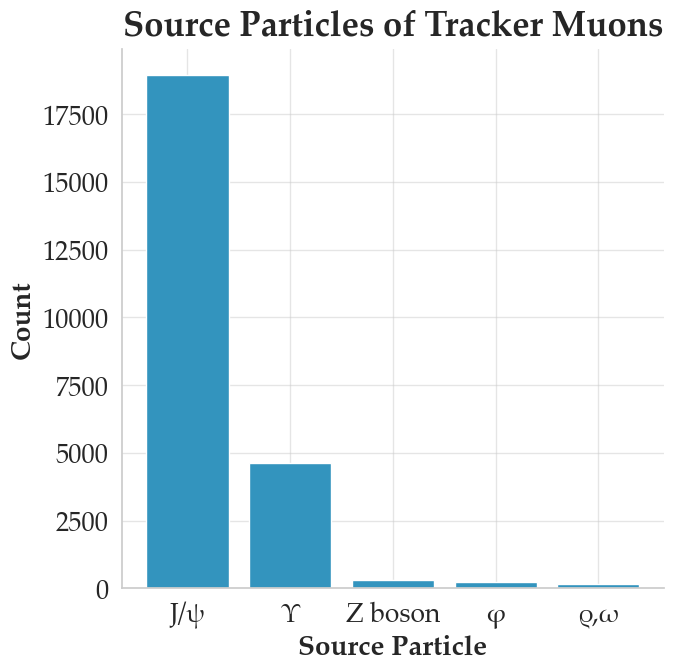

In [250]:
#Create a plot with the number of events from each source particle 

counts_T = muon_df['Source Particle'][T_muon_filter].value_counts()

plt.bar(counts_T.index, counts_T.values, color='#3394be')
plt.xlabel('Source Particle')
plt.ylabel('Count')
plt.title('Source Particles of Tracker Muons')
plt.xticks()  
plt.show()

In [301]:
T_muon_filter = muon_df.type2 == 'T' 
G_muon_filter = muon_df.type2 == 'G' 

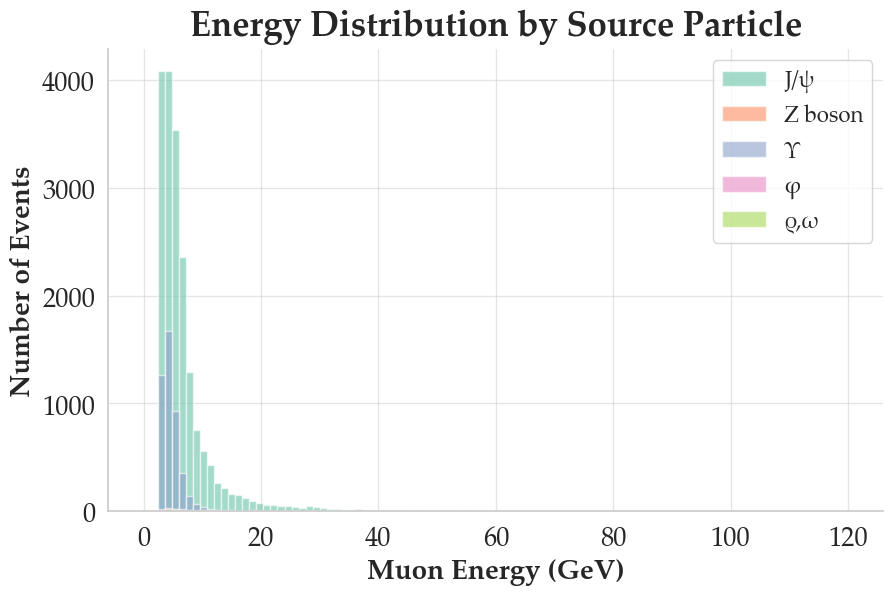

In [166]:
# Set figure size
plt.figure(figsize=(10, 6))

# Loop through each source particle
for source in muon_df['Source Particle'].dropna().unique():
    subset = muon_df[T_muon_filter & (muon_df['Source Particle'] == source)]
    plt.hist(subset['E2'], bins=100, alpha=0.6, label=source, range = (0,120))

# Labels and legend
plt.xlabel('Muon Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('Energy Distribution by Source Particle')
plt.legend()
plt.grid(True)
plt.show()

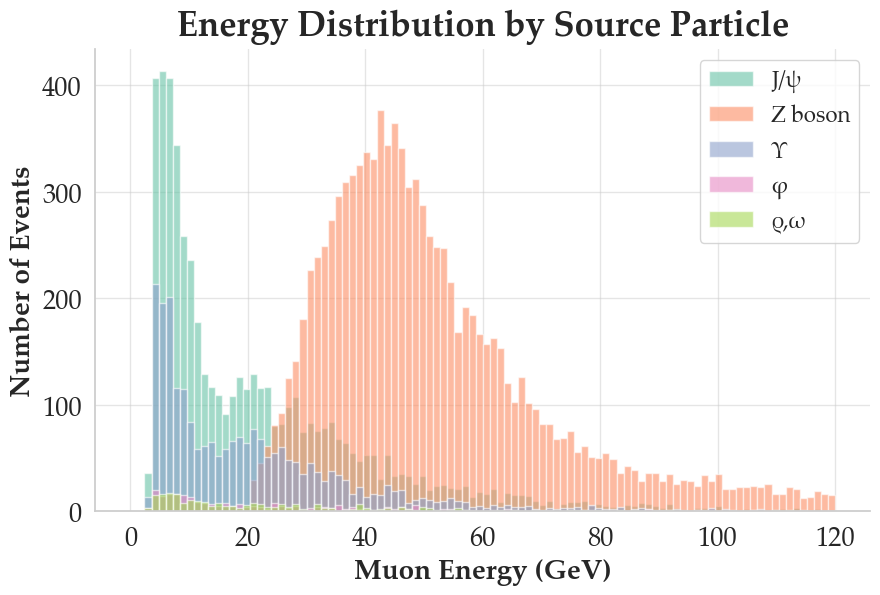

In [315]:
plt.figure(figsize=(10, 6))

# Loop through each source particle
for source in muon_df['Source Particle'].dropna().unique():
    subset = muon_df[G_muon_filter & (muon_df['Source Particle'] == source)]
    plt.hist(subset['E2'], bins=100, alpha=0.6, label=source, range = (0,120))

plt.xlabel('Muon Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('Energy Distribution by Source Particle')
plt.legend()
plt.grid(True)
plt.show()

In [279]:
T_pt = muon_df['pt2'][T_muon_filter] 
G_pt = muon_df['pt2'][G_muon_filter] 

Text(0.5, 0, 'Transverse Momenta [GeV]')

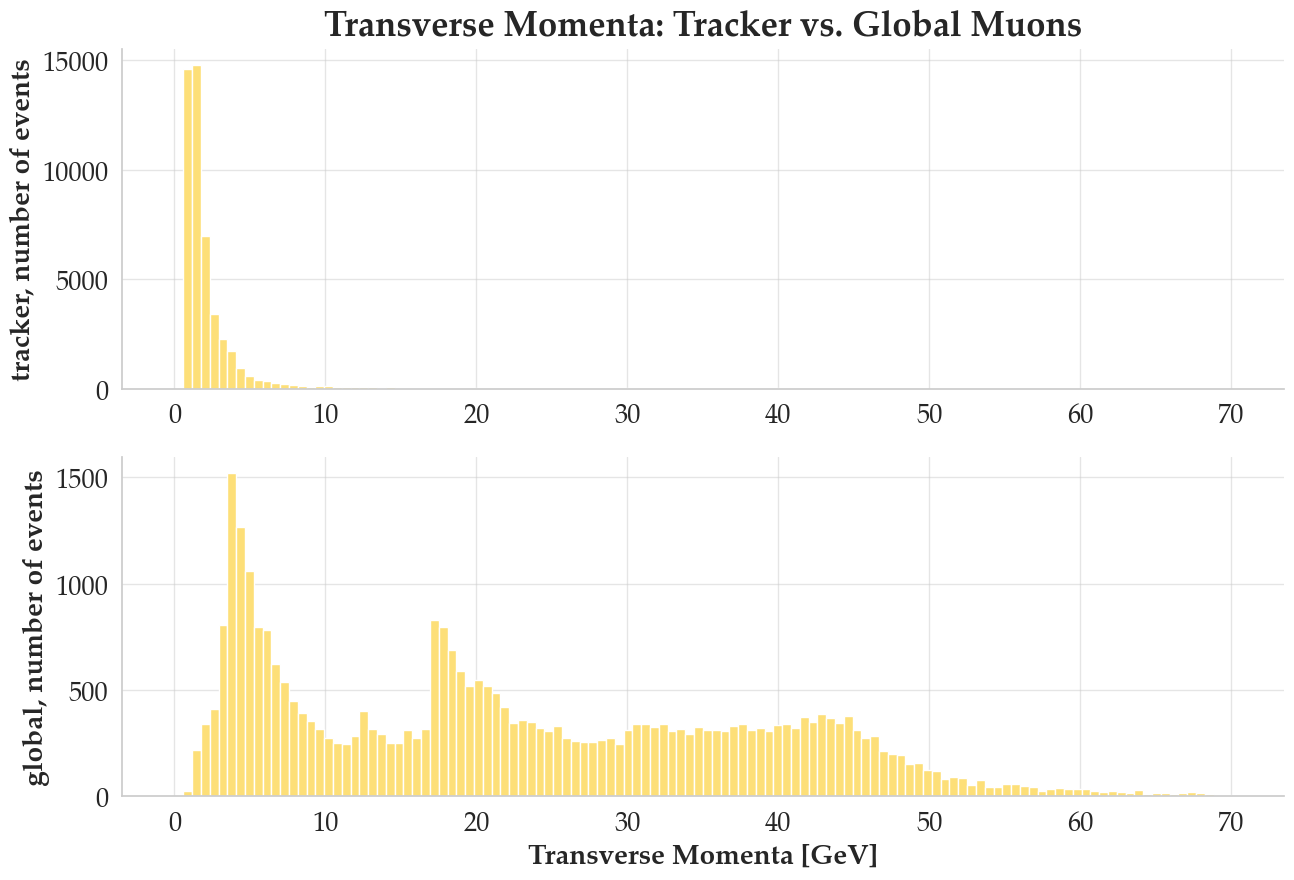

In [295]:
f = plt.figure(1)
f.set_figheight(15)
f.set_figwidth(15)

plt.subplot(311)
plt.hist(T_pt, bins=120, range=(0,70), color = '#fddf78')
plt.title("Transverse Momenta: Tracker vs. Global Muons")
plt.ylabel('tracker, number of events', fontsize=20)
plt.subplot(312)
plt.hist(G_pt, bins=120, range=(0,70), color = '#fddf78')
plt.ylabel('global, number of events', fontsize=20)
plt.xlabel('Transverse Momenta [GeV]', fontsize=20)

__Summary Table__ 

| Property     | Tracker Muon                        | Global Muon                        |
|--------------|--------------------------------------|-------------------------------------|
| Reconstruction | Track in tracker + muon stub         | Combined track from tracker + muon |
| Precision    | Better at low pT                     | Better at high pT                  |
| Use Case     | J/ψ, B decays                        | Z, W, heavy resonances             |

Tracker muons have less energy and momenta, that is why they do not make it to the muon chamber which is further away from the collision tube than the tracker. Global muons have greater energies since they originate from heavier particles like the Z boson. 

## Limitations & Assumptions 

When segmenting the events to source particles, some invariant mass ranges were taken from the CERN open data portal while the others were taken directly from the invariant mass histogram. This can influence the number of events from each source particle. However, it will not effect the other insights and conclusions. 

## Acknowledgements

I would like to thank my friend first and my instructor second Amal for helping me understand the topic and helping me with the interpretations. This project would not have been possible without her help. 

I would also like to thank my other instructors: Mr. Ali, Mr. Juan and Zahraa for giving me feedback and communicating what is not clear in my presentation from a non-physicist perspective. 

## References 

- [Fermilab Mu2e](https://mu2e.fnal.gov/)
- [Precise characterization of a corridor-shaped structure in Khufu’s Pyramid by observation of cosmic-ray muons](https://pmc.ncbi.nlm.nih.gov/articles/PMC9981702/)
- [The data source and the data dictionary](https://opendata.cern.ch/record/545)
- [CMS open data education Github](https://github.com/cms-opendata-education)
- [Open data for Particle Physics](https://opendata-education.github.io/en_Physics/Exercises-with-open-data/Advanced/Normfit-transversemomentum-and-pseudorapidity.html)